<a href="https://colab.research.google.com/github/BrianDL/fisica_computacional/blob/main/2%20-%20Perihelio%20de%20Mercurio/simulacion_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de la Órbita de Mercurio

Este notebook contiene la implementación del método de Runge-Kutta de segundo orden (RK2) para simular la órbita de Mercurio y calcular la precesión de su perihelio.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def simular_orbita_mercurio(
        x_inicial:float = None,  ### hacemos esta configuración más abajo
        y_inicial:float = 0,
        vx_inicial:float = 0,
        vy_inicial:float = None, ### hacemos esta configuración más abajo
        iteraciones:int = 20000,
        delta_t: float = 0.0001,
        alpha: float = 0.0008
    ):

    ### Configurando los valores iniciales por defecto
    # Constantes
    GM_s = 4 * np.pi**2
    a = 0.39
    e = 0.206

    # Inicializar variables
    x :float = x_inicial if x_inicial else (1+e)*a
    y :float = y_inicial
    vx:float = vx_inicial
    vy:float = vy_inicial if vy_inicial else np.sqrt( GM_s*(1-e)/( a*(1+e) ) )
    t :float = 0  # Tiempo inicial siempre igual cero

    # Listas para almacenar resultados
    tiempos = [t]
    posiciones = [(x, y)]
    velocidades = [(vx, vy)]

    # Bucle principal de la simulación
    for i in range(iteraciones):

        # Calcular variables radiales
        r = np.sqrt(x**2 + y**2)
        v = np.sqrt(vx**2 + vy**2)

        # Calcular los valores intermedios (k1)
        k1_x = delta_t * vx
        k1_y = delta_t * vy
        k1_vx = delta_t * (-GM_s * x / r**3) * (1 + alpha / r**2)
        k1_vy = delta_t * (-GM_s * y / r**3) * (1 + alpha / r**2)

        # Calcular los valores finales (k2)
        x_mid = x + 0.5*k1_x
        y_mid = y + 0.5*k1_y
        vx_mid = vx + 0.5*k1_vx
        vy_mid = vy + 0.5*k1_vy
        r_mid = np.sqrt(x_mid**2 + y_mid**2)

        k2_x = delta_t * vx_mid
        k2_y = delta_t * vy_mid
        k2_vx = delta_t * (-GM_s * x_mid / r_mid**3) * (1.0 + alpha / r_mid**2)
        k2_vy = delta_t * (-GM_s * y_mid / r_mid**3) * (1.0 + alpha / r_mid**2)

        # Actualizar los valores para el siguiente paso
        x += k2_x
        y += k2_y
        vx += k2_vx
        vy += k2_vy
        t += delta_t

        # Guardar los resultados en cada paso
        tiempos.append(t)
        posiciones.append( (x,y) )
        velocidades.append( (vx, vy) )

    return tiempos, posiciones, velocidades

Esta función `simular_orbita_mercurio` implementa el método RK2 para simular la órbita de Mercurio. En las siguientes celdas, añadiremos código para ejecutar la simulación, visualizar los resultados y calcular la precesión del perihelio.
Empezamos por correr la simulación y visualizar la órbita de Mercurio.

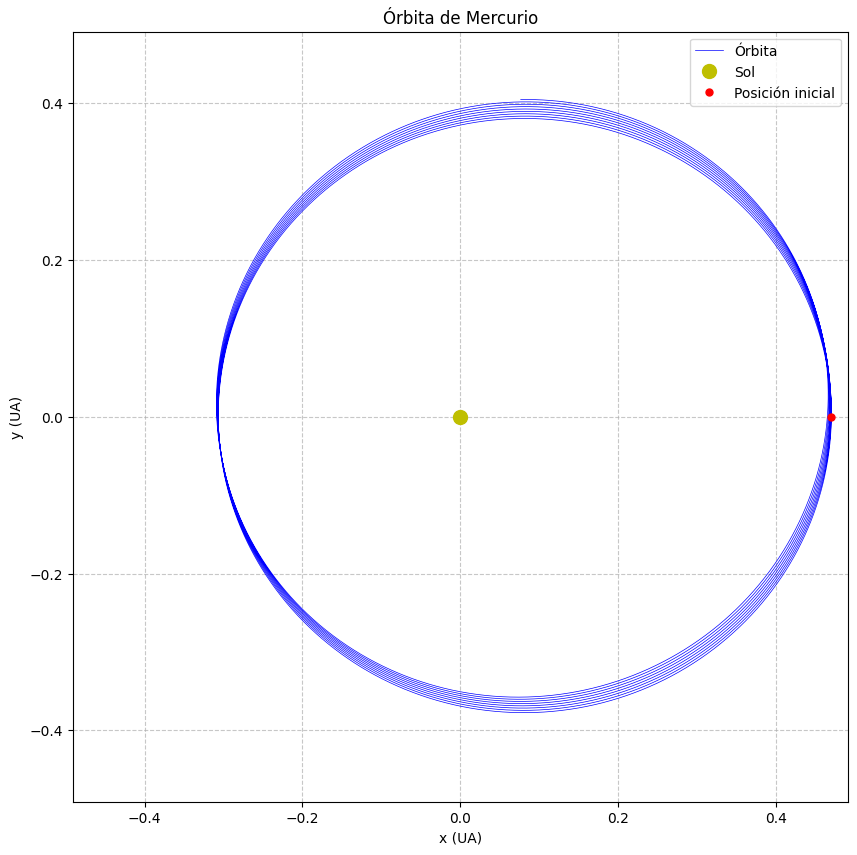

In [14]:

def plot_orbita(posiciones, titulo="Órbita de Mercurio"):
    # Extraer las coordenadas x e y de las posiciones
    x = [pos[0] for pos in posiciones]
    y = [pos[1] for pos in posiciones]

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotear la órbita
    ax.plot(x, y, 'b-', linewidth=0.5, label='Órbita')

    # Plotear el Sol
    ax.plot(0, 0, 'yo', markersize=10, label='Sol')

    # Plotear la posición inicial de Mercurio
    ax.plot(x[0], y[0], 'ro', markersize=5, label='Posición inicial')

    # Configurar los límites de los ejes
    max_range = max(max(x) - min(x) -0.2, max(y) - min(y) +0.2)
    ax.set_xlim(-(max_range/2), max_range/2)
    ax.set_ylim(-(max_range/2), max_range/2)

    # Configurar etiquetas y título
    ax.set_xlabel('x (UA)')
    ax.set_ylabel('y (UA)')
    ax.set_title(titulo)

    # Añadir leyenda
    ax.legend()

    # Añadir una cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Hacer que los ejes sean iguales para mantener la forma circular
    # ax.set_aspect('equal', 'box')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
# Primero, ejecutamos la simulación
tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha= 0.0008, iteraciones= 20000, delta_t= 0.0001)


#print("Tiempos", tiempos)
#print("posiciones", posiciones)
#print("velocidades", velocidades)

# Luego, ploteamos la órbita
plot_orbita(posiciones)

Ya que veificamos que funciona. Podemos proceder a graficar la relación del ángulo con el parámetro alfa, notamos que es lineal por lo que la pendiente del ángulo con respecto al tiempo será la precesión para un alfa dado.

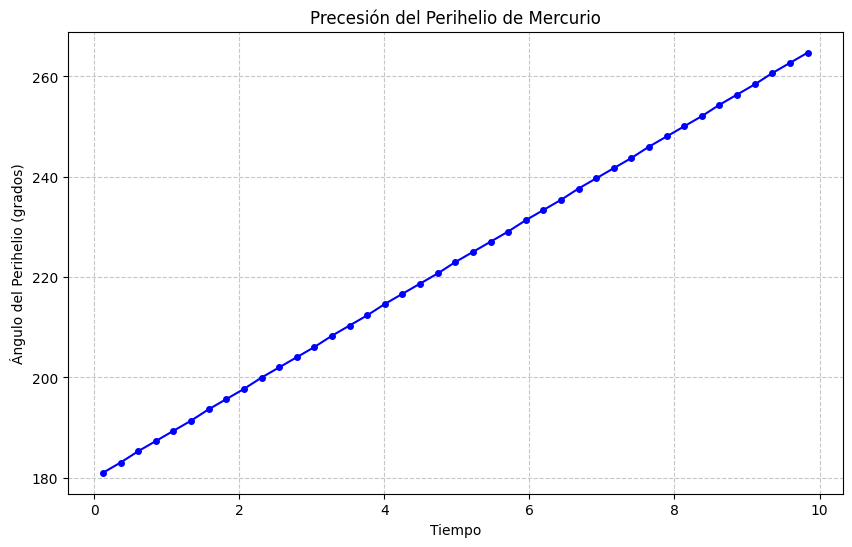

Tasa de precesión: 8.617487 grados por unidad de tiempo


In [3]:

def plot_precesion_perihelio(tiempos, posiciones, velocidades, titulo="Precesión del Perihelio de Mercurio"):
    perihelios = []
    tiempos_perihelio = []

    distancias = [ math.sqrt( x**2 + y**2 ) for x, y in posiciones ]

    # Encontrar los perihelios
    for i in range(1, len(tiempos) -1):
        x,y = posiciones[i]
        vx,vy = velocidades[i]

        distancia = distancias[i]
        distancia_siguiente = distancias[i+1]
        distancia_anterior = distancias[i-1]

        tasa_cambio_distancia = round( (x*vx + y*vy)/ distancia, 2)

        # print(tasa_cambio_distancia)
        if distancia_anterior > distancia and distancia_siguiente > distancia \
        and tasa_cambio_distancia == 0:
          perihelios.append( (x,y) )
          tiempos_perihelio.append(tiempos[i])

    # Calcular los ángulos de los perihelios
    angulos = [math.atan2(p[1], p[0]) for p in perihelios]

    # Convertir ángulos a grados
    angulos_grados = [math.degrees(a) % 360 for a in angulos]

    for i in range(1, len(angulos_grados)):
        while angulos_grados[i-1] >= angulos_grados[i]:
            angulos_grados[i] += 360

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotear los ángulos de los perihelios vs tiempo
    ax.plot(tiempos_perihelio, angulos_grados, 'bo-', markersize=4)

    # Configurar etiquetas y título
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Ángulo del Perihelio (grados)')
    ax.set_title(titulo)

    # Añadir una cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.show()

    # Calcular y mostrar la tasa de precesión
    if len(angulos_grados) > 1:
        tiempo_total = tiempos_perihelio[-1] - tiempos_perihelio[0]
        precesion_total = angulos_grados[-1] - angulos_grados[0]
        tasa_precesion = precesion_total / tiempo_total
        print(f"Tasa de precesión: {tasa_precesion:.6f} grados por unidad de tiempo")

# Ejemplo de uso:
# Primero, ejecutamos la simulación
tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha=0.0008, iteraciones=100000, delta_t=0.0001)

# Luego, ploteamos la precesión del perihelio
plot_precesion_perihelio(tiempos, posiciones, velocidades)

Implementamos lo aprendido de la celda anterior en una función que calcula la precesión basada en la salida de nuestra función simular_orbita_mercurio.

In [12]:
def calcular_precesion(tiempos, posiciones, velocidades):
    perihelios = []
    tiempos_perihelio = []

    # Encontrar los perihelios
    distancias = [ math.sqrt( x**2 + y**2 ) for x, y in posiciones ]

    # Encontrar los perihelios
    for i in range(1, len(tiempos) -1):
        x,y = posiciones[i]
        vx,vy = velocidades[i]

        distancia = distancias[i]
        distancia_siguiente = distancias[i+1]
        distancia_anterior = distancias[i-1]

        tasa_cambio_distancia = round( (x*vx + y*vy)/ distancia, 0)

        # print(tasa_cambio_distancia)
        if distancia_anterior > distancia and distancia_siguiente > distancia \
        and tasa_cambio_distancia == 0:
          perihelios.append( (x,y) )
          tiempos_perihelio.append(tiempos[i])


    # Calcular los ángulos de los perihelios
    angulos = [math.atan2(p[1], p[0]) for p in perihelios]

    # Convertir ángulos a grados
    angulos_grados = [math.degrees(a) for a in angulos]

    for i in range(1, len(angulos_grados)):
        while angulos_grados[i-1] > angulos_grados[i]:
            angulos_grados[i] += 360

    # Calcular y mostrar la tasa de precesión
    # tiempo_total = tiempos_perihelio[-1] - tiempos_perihelio[0]
    # precesion_total = angulos_grados[-1] - angulos_grados[0]
    # tasa_precesion = precesion_total / tiempo_total

    n = len(tiempos_perihelio)
    suma_x = sum(tiempos_perihelio)
    suma_y = sum(angulos_grados)
    suma_xy = sum(x*y for x, y in zip(tiempos_perihelio, angulos_grados))
    suma_x2 = sum(x*x for x in tiempos_perihelio)

    pendiente = (n * suma_xy - suma_x * suma_y) / (n * suma_x2 - suma_x * suma_x)
    intersecto = (suma_y - pendiente * suma_x) / n

    tasa_precesion = pendiente

    return tasa_precesion


Por último corremos varias simulaciones con distintos valores de alfa, verificamos que alfa tenga una relación lineal y estimamos el valor de la precesión para un alfa demasiado pequeño para ser simulado facilmente. Mostramos el valor convertido a segundos de arco por siglo.

Precesión para α=0.0008: 8.629711077461305
Precesión para α=0.001: 10.79931154145419
Precesión para α=0.002: 22.142557345258655
Precesión para α=0.004: 46.411095501486955


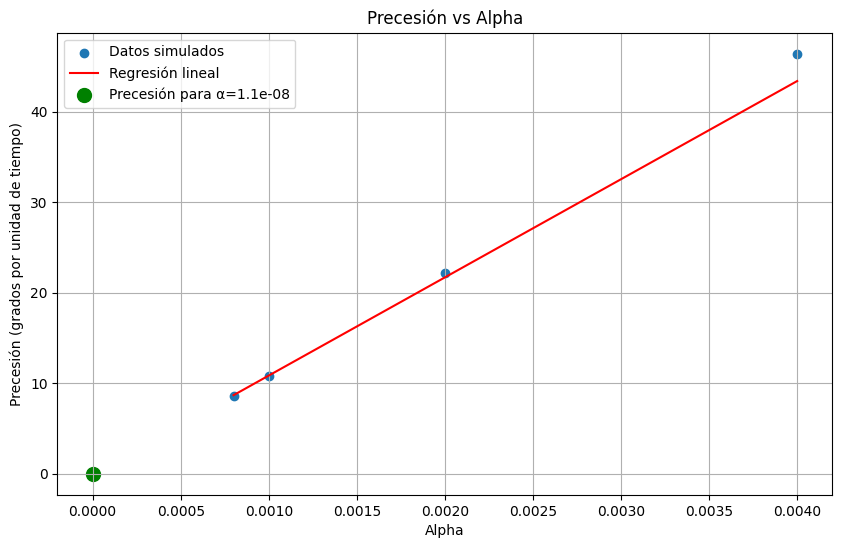

Precesión estimada para α=1.1e-08: 42.958089 segundos por siglo
Ecuación de la regresión lineal: y = 10848.002320x + 0.000000


In [13]:
def calcular_alpha(alphas, alpha_objetivo):
    precesiones = []

    for alpha in alphas:
        tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha=alpha)
        precesion = calcular_precesion(tiempos, posiciones, velocidades)
        precesiones.append(precesion)

        print(f"Precesión para α={alpha}: {precesion}")

    # Calcular la regresión lineal
    # n = len(alphas)
    # suma_x = sum(alphas)
    # suma_y = sum(precesiones)
    # suma_xy = sum(x*y for x, y in zip(alphas, precesiones))
    # suma_x2 = sum(x*x for x in alphas)

    # pendiente = (n * suma_xy - suma_x * suma_y) / (n * suma_x2 - suma_x * suma_x)
    # intersecto = (suma_y - pendiente * suma_x) / n

    # Calcular la precesión para alpha_objetivo
    pendiente = (precesiones[1] - precesiones[0]) / (alphas[1] - alphas[0])
    intersecto = 0

    precesion_objetivo = pendiente * alpha_objetivo + intersecto

    precesion_objetivo_sps = precesion_objetivo * (3600) * 100 # expresando en segundos por siglo

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(alphas, precesiones, label='Datos simulados')
    plt.plot(alphas, [pendiente * x + intersecto for x in alphas], color='red', label='Regresión lineal')
    plt.scatter([alpha_objetivo], [precesion_objetivo], color='green', s=100, label=f'Precesión para α={alpha_objetivo}')

    plt.xlabel('Alpha')
    plt.ylabel('Precesión (grados por unidad de tiempo)')
    plt.title('Precesión vs Alpha')
    plt.legend()
    plt.grid(True)

    plt.show()

    print(f"Precesión estimada para α={alpha_objetivo}: {precesion_objetivo_sps:.6f} segundos por siglo")
    print(f"Ecuación de la regresión lineal: y = {pendiente:.6f}x + {intersecto:.6f}")

# Ejemplo de uso:
alphas = [0.0008, 0.001, 0.002, 0.004]
alpha_objetivo = 0.000000011

calcular_alpha(alphas, alpha_objetivo)